(ecosystem)=
# Ecosystem 

 
<div style="display: flex; justify-content: center;">
    <video width="20%" height="340px" controls>
        <source src="../media/hubris.MP4" type="video/mp4">
        Your browser does not support the video tag.
    </video>
</div>


```{figure} https://www.ledr.com/colours/white.jpg
---
width: 1%
name: RIP DEI 
---
_Hubris_. The **function** of hubris in tragedy is to interrogate static vs. dynamic equilibria. Should we expect Mozartean cadences or eternally recurrent Wagnarian melodies? Should the trial and error ever end? Should we ever decelerate --rest-- from the Red Queen Hypothesis? Do immutable laws from the cosmos demand immutable laws in our physics, biology, and intelligence if ever our loss is to be optimized?
```



 



 
 

 

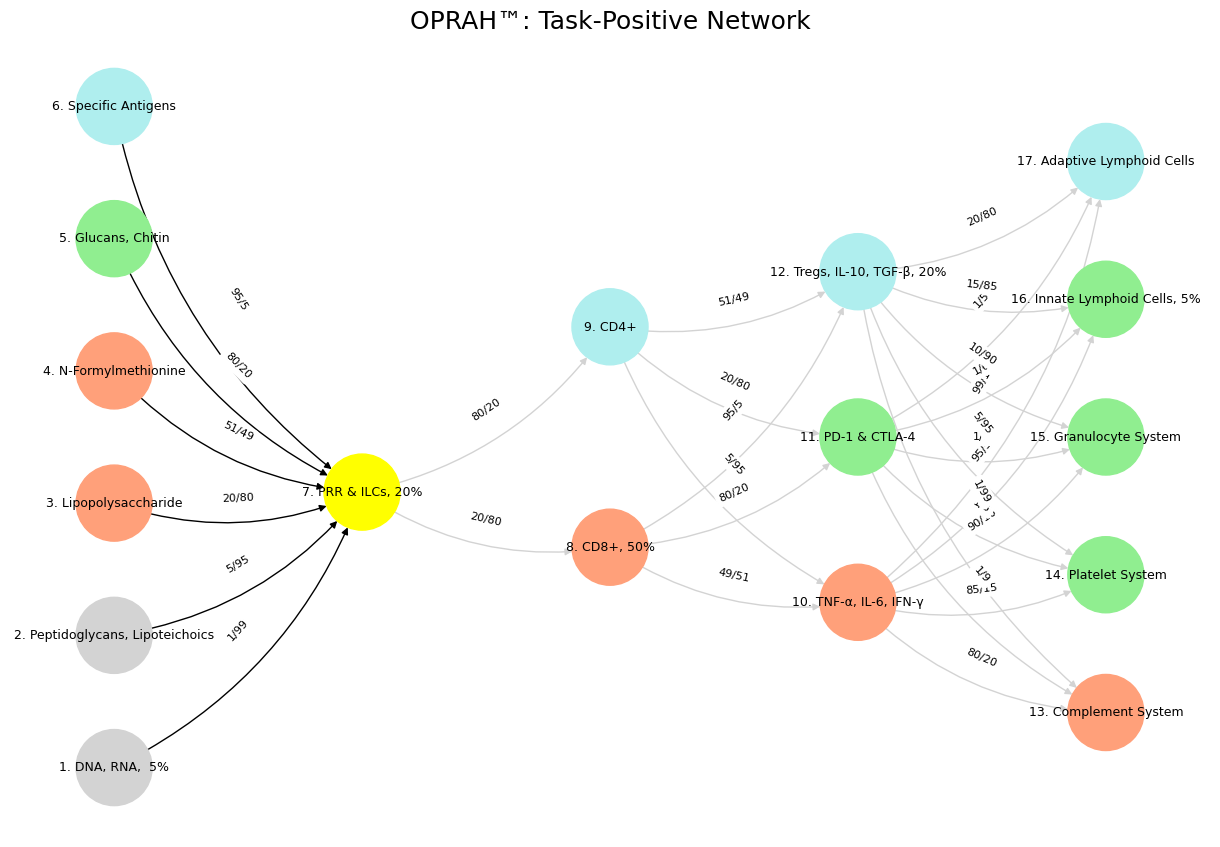

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network layers
def define_layers():
    return {
        'Suis': ['DNA, RNA,  5%', 'Peptidoglycans, Lipoteichoics', 'Lipopolysaccharide', 'N-Formylmethionine', "Glucans, Chitin", 'Specific Antigens'],
        'Voir': ['PRR & ILCs, 20%'],  
        'Choisis': ['CD8+, 50%', 'CD4+'],  
        'Deviens': ['TNF-α, IL-6, IFN-γ', 'PD-1 & CTLA-4', 'Tregs, IL-10, TGF-β, 20%'],  
        "M'èléve": ['Complement System', 'Platelet System', 'Granulocyte System', 'Innate Lymphoid Cells, 5%', 'Adaptive Lymphoid Cells']  
    }

# Assign colors to nodes
def assign_colors():
    color_map = {
        'yellow': ['PRR & ILCs, 20%'],  
        'paleturquoise': ['Specific Antigens', 'CD4+', 'Tregs, IL-10, TGF-β, 20%', 'Adaptive Lymphoid Cells'],  
        'lightgreen': ["Glucans, Chitin", 'PD-1 & CTLA-4', 'Platelet System', 'Innate Lymphoid Cells, 5%', 'Granulocyte System'],  
        'lightsalmon': ['Lipopolysaccharide', 'N-Formylmethionine', 'CD8+, 50%', 'TNF-α, IL-6, IFN-γ', 'Complement System'],
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Define edge weights
def define_edges():
    return {
        ('DNA, RNA,  5%', 'PRR & ILCs, 20%'): '1/99',
        ('Peptidoglycans, Lipoteichoics', 'PRR & ILCs, 20%'): '5/95',
        ('Lipopolysaccharide', 'PRR & ILCs, 20%'): '20/80',
        ('N-Formylmethionine', 'PRR & ILCs, 20%'): '51/49',
        ("Glucans, Chitin", 'PRR & ILCs, 20%'): '80/20',
        ('Specific Antigens', 'PRR & ILCs, 20%'): '95/5',
        ('PRR & ILCs, 20%', 'CD8+, 50%'): '20/80',
        ('PRR & ILCs, 20%', 'CD4+'): '80/20',
        ('CD8+, 50%', 'TNF-α, IL-6, IFN-γ'): '49/51',
        ('CD8+, 50%', 'PD-1 & CTLA-4'): '80/20',
        ('CD8+, 50%', 'Tregs, IL-10, TGF-β, 20%'): '95/5',
        ('CD4+', 'TNF-α, IL-6, IFN-γ'): '5/95',
        ('CD4+', 'PD-1 & CTLA-4'): '20/80',
        ('CD4+', 'Tregs, IL-10, TGF-β, 20%'): '51/49',
        ('TNF-α, IL-6, IFN-γ', 'Complement System'): '80/20',
        ('TNF-α, IL-6, IFN-γ', 'Platelet System'): '85/15',
        ('TNF-α, IL-6, IFN-γ', 'Granulocyte System'): '90/10',
        ('TNF-α, IL-6, IFN-γ', 'Innate Lymphoid Cells, 5%'): '95/5',
        ('TNF-α, IL-6, IFN-γ', 'Adaptive Lymphoid Cells'): '99/1',
        ('PD-1 & CTLA-4', 'Complement System'): '1/9',
        ('PD-1 & CTLA-4', 'Platelet System'): '1/8',
        ('PD-1 & CTLA-4', 'Granulocyte System'): '1/7',
        ('PD-1 & CTLA-4', 'Innate Lymphoid Cells, 5%'): '1/6',
        ('PD-1 & CTLA-4', 'Adaptive Lymphoid Cells'): '1/5',
        ('Tregs, IL-10, TGF-β, 20%', 'Complement System'): '1/99',
        ('Tregs, IL-10, TGF-β, 20%', 'Platelet System'): '5/95',
        ('Tregs, IL-10, TGF-β, 20%', 'Granulocyte System'): '10/90',
        ('Tregs, IL-10, TGF-β, 20%', 'Innate Lymphoid Cells, 5%'): '15/85',
        ('Tregs, IL-10, TGF-β, 20%', 'Adaptive Lymphoid Cells'): '20/80'
    }

# Define edges to be highlighted in black
def define_black_edges():
    return {
        ('DNA, RNA,  5%', 'PRR & ILCs, 20%'): '1/99',
        ('Peptidoglycans, Lipoteichoics', 'PRR & ILCs, 20%'): '5/95',
        ('Lipopolysaccharide', 'PRR & ILCs, 20%'): '20/80',
        ('N-Formylmethionine', 'PRR & ILCs, 20%'): '51/49',
        ("Glucans, Chitin", 'PRR & ILCs, 20%'): '80/20',
        ('Specific Antigens', 'PRR & ILCs, 20%'): '95/5',
    }

# Calculate node positions
def calculate_positions(layer, x_offset):
    y_positions = np.linspace(-len(layer) / 2, len(layer) / 2, len(layer))
    return [(x_offset, y) for y in y_positions]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    edges = define_edges()
    black_edges = define_black_edges()
    
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    
    # Create mapping from original node names to numbered labels
    mapping = {}
    counter = 1
    for layer in layers.values():
        for node in layer:
            mapping[node] = f"{counter}. {node}"
            counter += 1
            
    # Add nodes with new numbered labels and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        positions = calculate_positions(nodes, x_offset=i * 2)
        for node, position in zip(nodes, positions):
            new_node = mapping[node]
            G.add_node(new_node, layer=layer_name)
            pos[new_node] = position
            node_colors.append(colors.get(node, 'lightgray'))
    
    # Add edges with updated node labels
    edge_colors = []
    for (source, target), weight in edges.items():
        if source in mapping and target in mapping:
            new_source = mapping[source]
            new_target = mapping[target]
            G.add_edge(new_source, new_target, weight=weight)
            edge_colors.append('black' if (source, target) in black_edges else 'lightgrey')
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    edges_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors,
        node_size=3000, font_size=9, connectionstyle="arc3,rad=0.2"
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edges_labels, font_size=8)
    plt.title("OPRAH™: Task-Positive Network", fontsize=18)
    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
For the eyes of the Lord run to and fro throughout the whole earth, to shew himself strong in the behalf of them whose heart is perfect toward him. Herein thou hast done foolishly: therefore from henceforth thou shalt have wars. Source: 2 Chronicles 16: 8-9. The grammar of these visuals is plain: there's a space & time for the cooperative rhythm, transactional, and adversarial.
```


